In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
precas = pd.read_csv("../db/precalificaciones.csv")
precas = precas.drop_duplicates(subset="DPI")
base = pd.read_excel("../db/Salidas/Aumento_cartera/Formato_iniciativa_mitigacion_remesa_todos.xlsx")

In [3]:
len(base)

9349

In [4]:
final = pd.merge(base, precas, on="DPI", how="left")
final.drop(columns="TasaOferta", inplace=True)
final.head(2)

,DPI,MontoOfertaNuevo,MontoOfertaRecredito,PlazoOferta,FechaPrecalificacion,ColorPrecalificacion
0,3100870580614,6195.955533,6967.579502,60,NaN,NaN
1,2348353620101,15161.490772,15161.490772,48,NaN,NaN


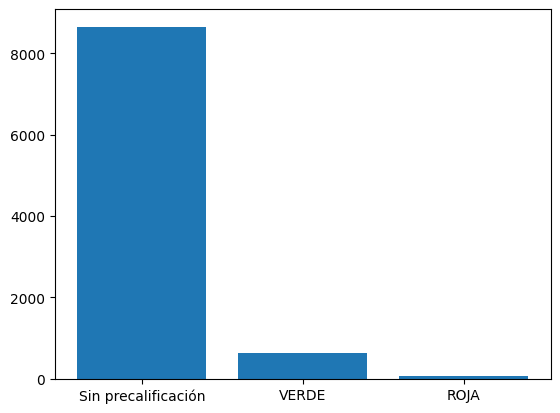

In [8]:
final["ColorPrecalificacion"].fillna("Sin precalificación", inplace=True)
conteo_colores = final["ColorPrecalificacion"].value_counts().reset_index(name="Conteo")
plt.bar(conteo_colores["ColorPrecalificacion"], conteo_colores["Conteo"])
plt.show()

In [9]:
final.to_excel("../db/Salidas/Aumento_cartera/Robert_con_precalificacion.xlsx")